In [1]:
__author__ = "CHEN CHEN"
__studentID__ = "18M15221"
__date__ = "2018/07/17"

"""
Problem 1 source code

Including the implementation of Logistic Regression by the steepest gradient method and the Newton based method.

"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LogisticRegressionGD:
    """
    Implementation of Logistic Regression based on gradient descent for Problem 1

    :param lam: float, default: 0.05
                 Lambda as the  parameter of the regularization. larger values specify stronger regularization.

    :param lr: float, default: None
                Learning rate of the gradient descent.
                If None it will use the inverse of the iteration.

    :param iter: int, default: 200
                  Iterations of the training.

    """
    def __init__(self, w=None, lam=0.05, lr=None, iter=200):
        self.w = w
        self.lam = lam
        self.lr = lr
        self.iter = iter
        self.train_loss = []

    def _prob(self, x, y, w):
        """
        Sigmoid function to calculate the probability of input samples

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :return: int/array_like,
                   Probability defined by sigmoid function.
        """
        return 1 / (1 + np.exp(-y * x.dot(self.w)))

    def _loss(self, x, y, w):
        """
        Loss function also expressed as J(w)

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :param w: array_like, shape(n_features)
                   Weight array.

        :return:  array_like,
                   Loss calculated at the input samples associated with the current weight w.
        """
        return np.sum(-np.log(self._prob(x, y, w))) + self.lam * w.dot(w)

    def _gradient(self, x, y, w):
        """
        Gradient of the current weight w.

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :param w: array_like, shape(n_features)
                   Weight array.

        :return:  int/array_like,
                   Gradient calculated at the input samples associated with the current weight w.
        """
        return np.sum((1 - self._prob(x, y, w)) * (-x.T * y), axis=1) + 2 * self.lam * w

    def fit(self, x, y):
        """
        Main routine of the model by fitting the given training data using GD.
        The details will be discussed in the report.

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :return:  None
        """
        x = np.hstack((x, np.ones(x.shape[0]).reshape(-1, 1)))
        self.w = np.zeros(x.shape[1])
        if self.lr is None:
            for i in range(self.iter):
                self.lr = 1 / (i + 1)
                self.train_loss.append(self._loss(x, y, self.w))
                self.w -= self.lr * self._gradient(x, y, self.w)
        else:
            for i in range(self.iter):
                self.train_loss.append(self._loss(x, y, self.w))
                self.w -= self.lr * self._gradient(x, y, self.w)

    def visualize(self):
        """
        Visualize the loss J(w) w.r.t the iteration.

        :return: None
        """
        assert self.train_loss, "Call fit() to train the model firstly"
        plt.figure(figsize=(8, 8))
        plt.plot(np.arange(self.iter), self.train_loss, c="b", label="Train Loss")
        plt.xlabel("iteration")
        plt.ylabel("J(w)")
        plt.legend()
#         plt.savefig(f"{self.__class__.__name__}_loss.pdf")
        plt.show()

    def _indicator(self, x, w):
        """
        Indicator function which classifier the input samples.

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param w: array_like, shape(n_features)
                   Weight array.

        :return: int/array_like
                   Label of the input samples.
        """
        return np.heaviside(x.dot(w), 0)

    def predict(self, x):
        assert self.w is not None, "Call fit() to train the model firstly"
        x = np.hstack((x, np.ones(x.shape[0]).reshape(-1, 1)))
        return 2 * self._indicator(x, self.w) - 1

In [3]:
class LogisticRegressionNewton(LogisticRegressionGD):
    """
    Implementation of Logistic Regression based on Newton method  for Problem 1

    Parameters:
        lam: float, default: 0.05
            Lambda as the  parameter of the regularization. larger values specify stronger regularization.

        lr: float, default: None
            Learning rate of the Netwon method.
            If None it will use the inverse of the iteration.

        iter: int, default: 200
            Iterations of the training.

    """
    def __init__(self, w=None, lam=0.05, lr=None, iter=200):
        super().__init__(w, lam, lr, iter)

    def _hessian_matrix(self, x, y, w):
        """
        Hessian matrix.

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :return:  array_like,
                   Hessian matrix.
        """
        return x.T.dot(np.diag((1-self._prob(x, y, w)) * self._prob(x, y, w))).dot(x) + 2 * self.lam * np.eye(x.shape[1])

    def fit(self, x, y):
        """
        Main routine of the model by fitting the given training data using Newton method.
        The details will be discussed in the report.

        :param x: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :return:  None
        """
        x = np.hstack((x, np.ones(x.shape[0]).reshape(-1, 1)))
        self.w = np.zeros(x.shape[1])
        if self.lr is None:
            for i in range(self.iter):
                self.lr = 1 / (i + 1)
                self.train_loss.append(self._loss(x, y, self.w))
                self.w -= self.lr * np.linalg.inv(self._hessian_matrix(x, y, self.w)).dot(self._gradient(x, y, self.w))
        else:
            for _ in range(self.iter):
                self.train_loss.append(self._loss(x, y, self.w))
                self.w -= self.lr * np.linalg.inv(self._hessian_matrix(x, y, self.w)).dot(self._gradient(x, y, self.w))


## generate dataset 2

In [4]:
# set seed
np.random.seed(15221)

n = 40
omega = np.random.randn(1)
noise = 0.8 * np.random.randn(n, 1)
x = np.random.randn(n, 2)
y = omega * x[:, 0].reshape(-1, 1) + x[:, 1].reshape(-1, 1) + noise
y = (2 * np.heaviside(y, 0) - 1)[:, 0]

## plot dataset 2

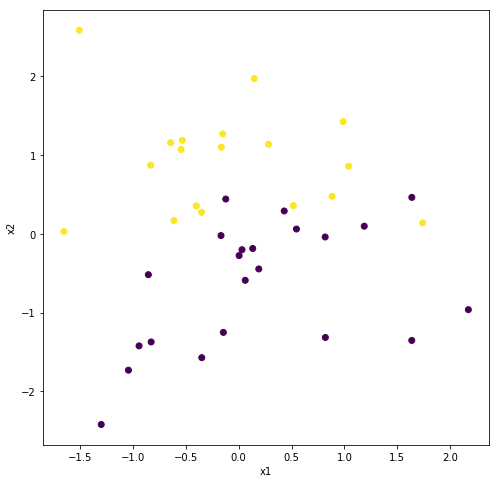

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
# plt.savefig("Dataset2.pdf")
plt.show()

## train LogisticRegressionGD model

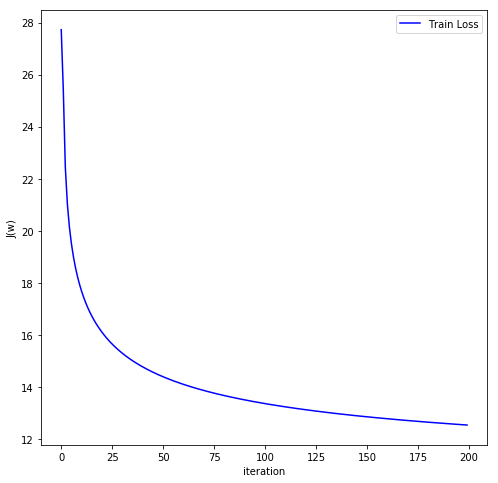

In [6]:
clf1 = LogisticRegressionGD()
clf1.fit(x, y)
clf1.visualize()

## train LogisticRegressionNewton model

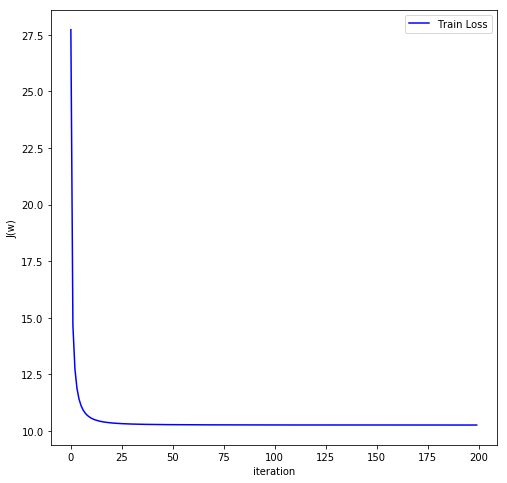

In [7]:
clf2 = LogisticRegressionNewton()
clf2.fit(x, y)
clf2.visualize()

## compare the performance of the steepest gradient method and Newton based method

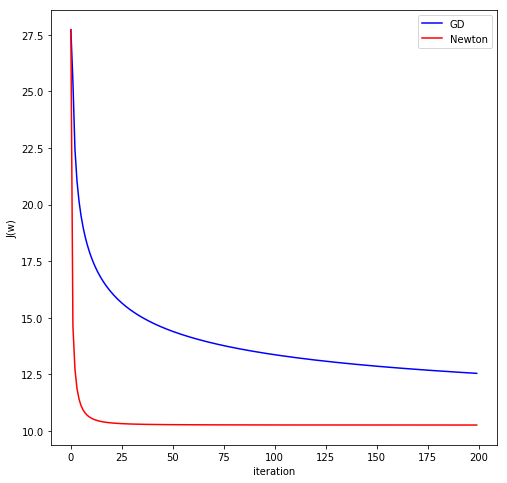

In [8]:
plt.figure(figsize=(8, 8))
plt.plot(np.arange(clf1.iter), clf1.train_loss, c="b", label="GD")
plt.plot(np.arange(clf1.iter), clf2.train_loss, c="r", label="Newton")
plt.xlabel("iteration")
plt.ylabel("J(w)")
plt.legend()
# plt.savefig("compare_loss.pdf")
plt.show()